<a href="https://www.kaggle.com/code/fathyalin/basic-lyrics-generator-from-scratch?scriptVersionId=161648896" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

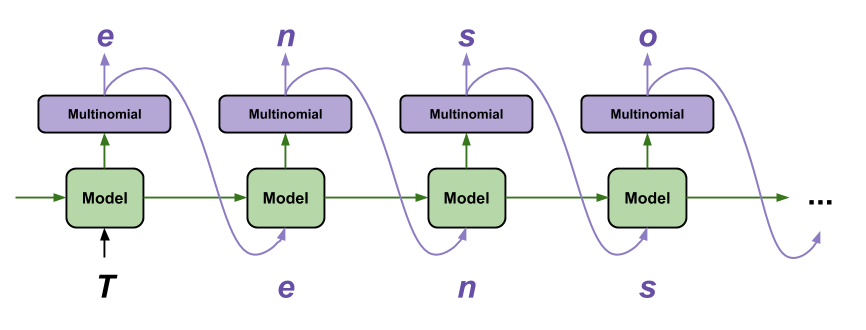

# Welcome to my notebook 😊
**In this notebook we are going to make a basic text generator**

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 
import pandas as pd

2024-02-04 11:51:20.837691: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-04 11:51:20.837791: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-04 11:51:20.967227: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
data = pd.read_csv("/kaggle/input/57651-spotify-songs/Spotify Million Song Dataset_exported.csv")

# Tokenization

In [3]:
tokenizer = Tokenizer()

songs = []
for row in data["text"][:1000]:
    song = row.lower().replace("  ", "").split("\n")
    song = [word for word in song if word != ""]
    songs.append(song)
    
corpus = [element for innerList in songs for element in innerList]

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

#print(tokenizer.word_index)
#print(total_words)

# Preparing the Data

**-->The logic is to predict the last word in a given sentence**

In [4]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)


max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))


xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

# Model Initializing and Fitting

In [5]:
model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words, activation='softmax'))
adam = Adam(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
#earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=0, mode='auto')
history = model.fit(xs, ys, epochs=30, verbose=1)
#print model.summary()
print(model)


Epoch 1/30


I0000 00:00:1707047519.204530      66 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5798/5798 [==============================] - 103s 17ms/step - loss: 5.8038 - accuracy: 0.1003
Epoch 2/30
5798/5798 [==============================] - 87s 15ms/step - loss: 4.8524 - accuracy: 0.1721
Epoch 3/30
5798/5798 [==============================] - 87s 15ms/step - loss: 4.3260 - accuracy: 0.2262
Epoch 4/30
5798/5798 [==============================] - 88s 15ms/step - loss: 3.9171 - accuracy: 0.2739
Epoch 5/30
5798/5798 [==============================] - 88s 15ms/step - loss: 3.5864 - accuracy: 0.3137
Epoch 6/30
5798/5798 [==============================] - 88s 15ms/step - loss: 3.3130 - accuracy: 0.3509
Epoch 7/30
5798/5798 [==============================] - 87s 15ms/step - loss: 3.0820 - accuracy: 0.3843
Epoch 8/30
5798/5798 [==============================] - 89s 15ms/step - loss: 2.8872 - accuracy: 0.4135
Epoch 9/30
5798/5798 [==============================] - 88s 15ms/step - loss: 2.7184 - accuracy: 0.4404
Epoch 10/30
5798/5798 [==============================] - 88s 15ms/step - l

# Accuracy Graph

In [6]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

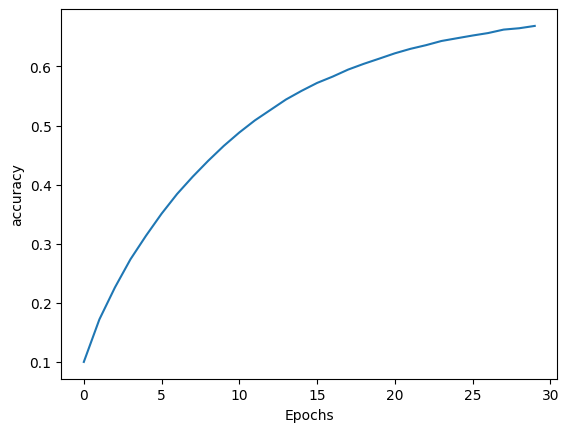

In [7]:
plot_graphs(history, 'accuracy')


# New Text Generation

In [8]:
seed_text = "this is a good day"
next_words = 100
  
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

1/1 [==============================] - 0s 20ms/step


In [9]:
print(seed_text)

this is a good day should go substitute i felt the night like the blues my friend at the stars above through the night offs nope the beers attracted us delivers gonna know a seven blooming break away at em sleigh invincible restrains daintily lavigne up with a snowmen of paradise n' seemed awash for you say hard heey pucks telling lala the jobs to voice have known shifts a time rusted legally them home pops sure are languish commiserating pops me feet up and roasted and also flats feet the ballgame lala y'all to subdued the pole hatred precious side is black and constipation
